In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale 조정, train_test_split 등을 추가

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [8]:
print('타겟 :', data[1,0])
# print('이미지(784pixel=28*28) :', data[1,1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)

타겟 : 0.0


In [13]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  0253252165  0  0 

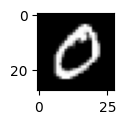

In [16]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [ ]:
# 컬러사진 -> 흑백모드로 넘파이 배열로 읽기

In [17]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   --------- ------------------------------ 8.7/38.1 MB 53.8 MB/s eta 0:00:01
   ----------- ---------------------------- 10.5/38.1 MB 28.5 MB/s eta 0:00:01
   ------------------ --------------------- 17.6/38.1 MB 29.9 MB/s eta 0:00:01
   ------------------------------- -------- 29.6/38.1 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 39.6 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 37.2 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
import cv2
# 사진이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg',cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

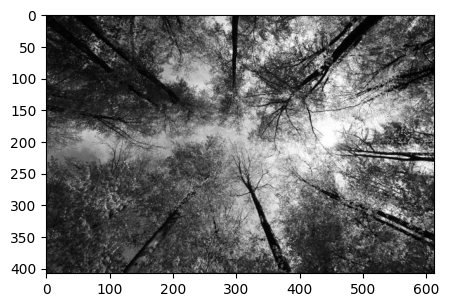

In [22]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
print(y_test[1])
# plt.imshow(X_test[1], cmap='gray')
# plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel),end='')
    print()

2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0

In [41]:
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [42]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [76]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(10000, 784).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape,val_X.shape,test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [53]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동입력)
val_Y = to_categorical(y_val) 
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [61]:
# Train 5만 -> 700개, val 만 -> 300개 (목적: 수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 뽑기
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [64]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델 구성

In [65]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수 결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [66]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

# 4. 모델 학습

In [67]:
%%time
hist=model.fit(train_X,train_Y, # 학습셋
               epochs=200,
               batch_size=100,
               validation_data=(val_X,val_Y),
               verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 29ms/step - loss: 2.3095 - accuracy: 0.0500 - val_loss: 2.3031 - val_accuracy: 0.0400
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2814 - accuracy: 0.0571 - val_loss: 2.2831 - val_accuracy: 0.0433
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2637 - accuracy: 0.0857 - val_loss: 2.2679 - val_accuracy: 0.1100
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2471 - accuracy: 0.1771 - val_loss: 2.2529 - val_accuracy: 0.1900
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 2.2318 - accuracy: 0.2129 - val_loss: 2.2381 - val_accuracy: 0.2000
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 2.2177 - accuracy: 0.2400 - val_loss: 2.2268 - val_accuracy: 0.2000
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2037 - accuracy: 0.2443 - val_loss: 2.2128 - val_accuracy: 0.2033
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.6894 - accuracy: 0.3800 - val_loss: 1.7667 - val_accuracy: 0.3500
Epoch 60/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6819 - accuracy: 0.3843 - val_loss: 1.7624 - val_accuracy: 0.3467
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6751 - accuracy: 0.3857 - val_loss: 1.7566 - val_accuracy: 0.3533
Epoch 62/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6679 - accuracy: 0.3843 - val_loss: 1.7513 - val_accuracy: 0.3567
Epoch 63/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6607 - accuracy: 0.3929 - val_loss: 1.7455 - val_accuracy: 0.3600
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6548 - accuracy: 0.3943 - val_loss: 1.7410 - val_accuracy: 0.3600
Epoch 65/200
7/7 [==============================] - 0s 4ms/step - loss: 1.6479 - accuracy: 0.4000 - val_loss: 1.7375 - val_accuracy: 0.3500
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.4047 - accuracy: 0.4814 - val_loss: 1.5767 - val_accuracy: 0.4233
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.4013 - accuracy: 0.4871 - val_loss: 1.5744 - val_accuracy: 0.4233
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3980 - accuracy: 0.4829 - val_loss: 1.5726 - val_accuracy: 0.4233
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3950 - accuracy: 0.4871 - val_loss: 1.5698 - val_accuracy: 0.4267
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3919 - accuracy: 0.4843 - val_loss: 1.5687 - val_accuracy: 0.4200
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3889 - accuracy: 0.4886 - val_loss: 1.5672 - val_accuracy: 0.4267
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3858 - accuracy: 0.4843 - val_loss: 1.5649 - val_accuracy: 0.4267
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.2620 - accuracy: 0.4986 - val_loss: 1.5195 - val_accuracy: 0.4333
Epoch 176/200
7/7 [==============================] - 0s 7ms/step - loss: 1.2606 - accuracy: 0.4986 - val_loss: 1.5202 - val_accuracy: 0.4400
Epoch 177/200
7/7 [==============================] - 0s 4ms/step - loss: 1.2577 - accuracy: 0.4986 - val_loss: 1.5198 - val_accuracy: 0.4433
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 1.2564 - accuracy: 0.5014 - val_loss: 1.5197 - val_accuracy: 0.4433
Epoch 179/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2541 - accuracy: 0.5000 - val_loss: 1.5190 - val_accuracy: 0.4400
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2525 - accuracy: 0.5014 - val_loss: 1.5205 - val_accuracy: 0.4433
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 1.2504 - accuracy: 0.5029 - val_loss: 1.5179 - val_accuracy: 0.4367
Epoch 182/200
7/7 [========

# 5. 모델 평가하기

In [68]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

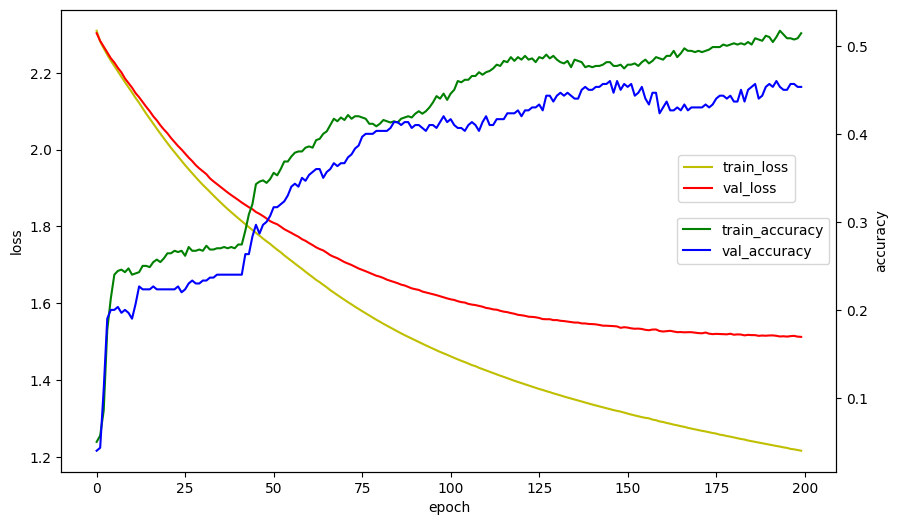

In [69]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [70]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X,test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.538437008857727
accuracy : 0.43299999833106995


# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, unit수 증가)
- 과적합(validation data 추가, 활성화 함수 relu계열, tanh, Dropout)
- epoch 조정
- optimizer 변경

In [85]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1000, activation='relu')) # activation='leakyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/50
500/500 [==============================] - 3s 5ms/step - loss: 0.2468 - accuracy: 0.9277 - val_loss: 0.1307 - val_accuracy: 0.9616
Epoch 2/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0951 - accuracy: 0.9719 - val_loss: 0.0876 - val_accuracy: 0.9730
Epoch 3/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0776 - val_accuracy: 0.9773
Epoch 4/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.0707 - val_accuracy: 0.9795
Epoch 5/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 6/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 7/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0681 - val_accuracy: 0.9809
Epoch 

In [86]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9844


[0.0912376344203949, 0.9843999743461609]

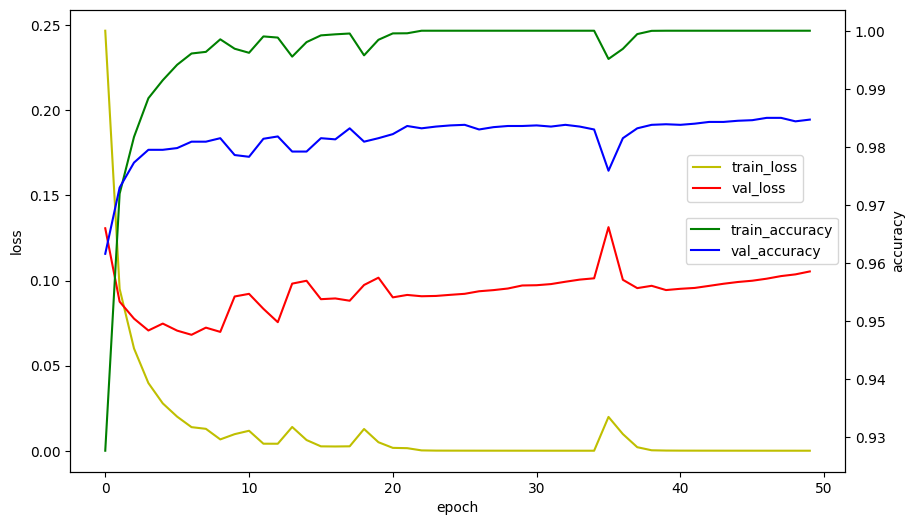

In [87]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [103]:
# 모델평가
score = model.evaluate(test_X,test_Y)
score[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9844


0.9843999743461609

In [93]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값(y_test)

True

In [99]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X),axis=1) # 예측값

313/313 [==============================] - 1s 2ms/step


In [101]:
pd.crosstab(y_test, y_hat, rownames=['실제값'],colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,972,1,1,0,1,1,2,1,1,0
1,0,1128,1,0,0,0,2,1,3,0
2,2,1,1015,0,2,0,1,6,4,1
3,1,0,2,995,0,3,0,3,2,4
4,1,0,2,1,965,0,2,2,1,8
5,2,0,0,8,1,873,4,1,2,1
6,3,3,1,1,2,4,944,0,0,0
7,1,1,7,2,1,0,0,1010,3,3
8,0,0,4,5,3,2,1,3,953,3


In [105]:
# 틀린갯수
10000 - 10000*score[1]

156.0002565383911

# ※ 콜백함수1 : 로그출력

In [106]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [108]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch=0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{:.4f}, acc:{:.4f}, val_loss:{:.4f}, val_acc:{:.4f}'.format(
                self.epoch, logs.get('loss'), logs.get('accuracy', '-'),
                logs.get('val_loss', '-'), logs.get('val_accuracy', '-')
              ))

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) 
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
CustomHistory = CustomHistory()
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[CustomHistory]) # 콜백함수

epoch:10, loss:2.0847, acc:0.2814, val_loss:2.1096, val_acc:0.2567
epoch:20, loss:1.8895, acc:0.3343, val_loss:1.9317, val_acc:0.2833
epoch:30, loss:1.7393, acc:0.3800, val_loss:1.8002, val_acc:0.3433
epoch:40, loss:1.6264, acc:0.4229, val_loss:1.6990, val_acc:0.3900
epoch:50, loss:1.5426, acc:0.4543, val_loss:1.6191, val_acc:0.4067
CPU times: total: 2.83 s
Wall time: 2.25 s


# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [111]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) 
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 0s 23ms/step - loss: 2.2747 - accuracy: 0.1686 - val_loss: 2.2437 - val_accuracy: 0.1833
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2402 - accuracy: 0.1886 - val_loss: 2.2123 - val_accuracy: 0.1967
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2114 - accuracy: 0.2000 - val_loss: 2.1810 - val_accuracy: 0.2033
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1879 - accuracy: 0.2086 - val_loss: 2.1546 - val_accuracy: 0.2133
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 2.1646 - accuracy: 0.2257 - val_loss: 2.1336 - val_accuracy: 0.2300
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 2.1452 - accuracy: 0.2457 - val_loss: 2.1121 - val_accuracy: 0.2300
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 2.1269 - accuracy: 0.2529 - val_loss: 2.0937 - val_accuracy: 0.2367
Epoch 8/500
7/7 [=========

# ※ 콜백함수3 : ModelCheckpoint
- epoch마다 val_accuracy(val_los, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [114]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) 
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath=file,
                monitor='val_accuracy', # 모니터할 지표(기본값 val_loss)
                save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                mode='max', # 값이 클수록 저장
                verbose=1
)
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[checkpoint]) # 콜백함수

Epoch 1/200
1/7 [===>..........................] - ETA: 1s - loss: 2.3143 - accuracy: 0.1100
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to ./model08\mnist-001-val0.1533.h5
7/7 [==============================] - 0s 27ms/step - loss: 2.3006 - accuracy: 0.1071 - val_loss: 2.2792 - val_accuracy: 0.1533
Epoch 2/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2849 - accuracy: 0.1700
Epoch 2: val_accuracy improved from 0.15333 to 0.18000, saving model to ./model08\mnist-002-val0.1800.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2788 - accuracy: 0.1543 - val_loss: 2.2626 - val_accuracy: 0.1800
Epoch 3/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2738 - accuracy: 0.1600
Epoch 3: val_accuracy did not improve from 0.18000
7/7 [==============================] - 0s 6ms/step - loss: 2.2622 - accuracy: 0.1629 - val_loss: 2.2358 - val_accuracy: 0.1700
Epoch 4/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2453 - accur

Epoch 30/200
1/7 [===>..........................] - ETA: 0s - loss: 2.0216 - accuracy: 0.2300
Epoch 30: val_accuracy did not improve from 0.20667
7/7 [==============================] - 0s 5ms/step - loss: 2.0486 - accuracy: 0.2057 - val_loss: 2.0071 - val_accuracy: 0.2067
Epoch 31/200
1/7 [===>..........................] - ETA: 0s - loss: 2.0554 - accuracy: 0.2100
Epoch 31: val_accuracy improved from 0.20667 to 0.22000, saving model to ./model08\mnist-031-val0.2200.h5
7/7 [==============================] - 0s 5ms/step - loss: 2.0438 - accuracy: 0.2129 - val_loss: 2.0021 - val_accuracy: 0.2200
Epoch 32/200
1/7 [===>..........................] - ETA: 0s - loss: 2.0547 - accuracy: 0.1600
Epoch 32: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 5ms/step - loss: 2.0391 - accuracy: 0.2200 - val_loss: 1.9987 - val_accuracy: 0.2167
Epoch 33/200
1/7 [===>..........................] - ETA: 0s - loss: 1.9278 - accuracy: 0.2500
Epoch 33: val_accuracy did not im

Epoch 60/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8808 - accuracy: 0.2300
Epoch 60: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 4ms/step - loss: 1.9327 - accuracy: 0.2271 - val_loss: 1.9069 - val_accuracy: 0.2133
Epoch 61/200
1/7 [===>..........................] - ETA: 0s - loss: 1.9662 - accuracy: 0.2200
Epoch 61: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 3ms/step - loss: 1.9293 - accuracy: 0.2286 - val_loss: 1.9034 - val_accuracy: 0.2133
Epoch 62/200
1/7 [===>..........................] - ETA: 0s - loss: 2.0085 - accuracy: 0.2000
Epoch 62: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 5ms/step - loss: 1.9261 - accuracy: 0.2286 - val_loss: 1.9006 - val_accuracy: 0.2133
Epoch 63/200
1/7 [===>..........................] - ETA: 0s - loss: 1.9600 - accuracy: 0.1800
Epoch 63: val_accuracy did not improve from 0.22000
7/7 [==============================

1/7 [===>..........................] - ETA: 0s - loss: 1.8415 - accuracy: 0.2200
Epoch 90: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 7ms/step - loss: 1.8526 - accuracy: 0.2357 - val_loss: 1.8439 - val_accuracy: 0.2167
Epoch 91/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8075 - accuracy: 0.2900
Epoch 91: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 6ms/step - loss: 1.8505 - accuracy: 0.2371 - val_loss: 1.8424 - val_accuracy: 0.2167
Epoch 92/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8202 - accuracy: 0.2400
Epoch 92: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 5ms/step - loss: 1.8484 - accuracy: 0.2357 - val_loss: 1.8407 - val_accuracy: 0.2167
Epoch 93/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8263 - accuracy: 0.2000
Epoch 93: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 5ms/st

Epoch 120/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8046 - accuracy: 0.2400
Epoch 120: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 5ms/step - loss: 1.8010 - accuracy: 0.2371 - val_loss: 1.8077 - val_accuracy: 0.2200
Epoch 121/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8072 - accuracy: 0.2200
Epoch 121: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 4ms/step - loss: 1.7996 - accuracy: 0.2371 - val_loss: 1.8068 - val_accuracy: 0.2200
Epoch 122/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7658 - accuracy: 0.2700
Epoch 122: val_accuracy did not improve from 0.22000
7/7 [==============================] - 0s 6ms/step - loss: 1.7982 - accuracy: 0.2371 - val_loss: 1.8058 - val_accuracy: 0.2200
Epoch 123/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8225 - accuracy: 0.2700
Epoch 123: val_accuracy did not improve from 0.22000
7/7 [======================

Epoch 149/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7794 - accuracy: 0.2000
Epoch 149: val_accuracy did not improve from 0.24333
7/7 [==============================] - 0s 6ms/step - loss: 1.7654 - accuracy: 0.2486 - val_loss: 1.7844 - val_accuracy: 0.2433
Epoch 150/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6697 - accuracy: 0.2500
Epoch 150: val_accuracy did not improve from 0.24333
7/7 [==============================] - 0s 6ms/step - loss: 1.7641 - accuracy: 0.2500 - val_loss: 1.7838 - val_accuracy: 0.2433
Epoch 151/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7582 - accuracy: 0.2400
Epoch 151: val_accuracy improved from 0.24333 to 0.25000, saving model to ./model08\mnist-151-val0.2500.h5
7/7 [==============================] - 0s 7ms/step - loss: 1.7633 - accuracy: 0.2514 - val_loss: 1.7831 - val_accuracy: 0.2500
Epoch 152/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7605 - accuracy: 0.2500
Epoch 152: val_accuracy im

7/7 [==============================] - 0s 5ms/step - loss: 1.7371 - accuracy: 0.2643 - val_loss: 1.7669 - val_accuracy: 0.2533
Epoch 179/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7625 - accuracy: 0.2400
Epoch 179: val_accuracy did not improve from 0.25333
7/7 [==============================] - 0s 8ms/step - loss: 1.7363 - accuracy: 0.2643 - val_loss: 1.7663 - val_accuracy: 0.2467
Epoch 180/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6943 - accuracy: 0.2400
Epoch 180: val_accuracy did not improve from 0.25333
7/7 [==============================] - 0s 6ms/step - loss: 1.7354 - accuracy: 0.2714 - val_loss: 1.7656 - val_accuracy: 0.2467
Epoch 181/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6420 - accuracy: 0.3000
Epoch 181: val_accuracy did not improve from 0.25333
7/7 [==============================] - 0s 6ms/step - loss: 1.7345 - accuracy: 0.2686 - val_loss: 1.7651 - val_accuracy: 0.2467
Epoch 182/200
1/7 [===>.........................